In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [49]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [50]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

1. first we want to drop the rows where the respondentID is a nan value


In [51]:
#create a boolean mask for the rows with nan values as respondentID
def check(val):
    a = False
    if pd.isnull(val) == True:
        a = False
    else:
        a = True
    return a
    
bol = star_wars['RespondentID'].apply(check)


In [52]:
star_wars = star_wars[bol]

2. The necxt columns are going to be converted from the Yes and No values to a False and True boolen values unstead to make it easier for them to be analysed



In [53]:
def change_val(val):
    val = str(val)
    new_val = False
    if val == 'Yes':
        new_val = True
    elif val == 'No':
        new_val = False
    else:
        new_val = val
    return new_val
listed = ['Have you seen any of the 6 films in the Star Wars franchise?',
          'Do you consider yourself to be a fan of the Star Wars film franchise?'
         ]
for col in listed:
    star_wars[col] = star_wars[col].apply(change_val)
    

In [54]:
#to confirm that it worked

for col in listed:
    print(star_wars[col].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
nan      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The next set of columns represent a choice tickable box of a question asking if the respondent have watched a particluar franchise of star wars. to clean the column, we
1. map the answers as either true or false, wether they saw the movie type or not
2. rename the column to the particluar star wars movie franchise


In [56]:
#save the name of the columns into a list for easy iteration
columns = star_wars.columns[3:9].tolist()

#first we convert the change the values of the columns to either true or false
def seen_col(val):
    val = str(val)
    new_val = False
    if len(val)>5:
        new_val = True
    else:
        new_val = False
    return new_val
for col in columns:
    star_wars[col] = star_wars[col].apply(seen_col)


In [64]:
#Next we rename the columns names to seen1 or seen2 and so on
renamer = {}
for i in range(len(columns)):
    renamer[columns[i]] = 'seen_{}'.format(i+1)

#Then we use this dictionary to rename the columns 
star_wars = star_wars.rename(columns = renamer)

In [65]:
#We check if it has been reflected
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,nan,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


1. The next six columns asked the respondents to rate the movies on a scale of 1 to 6, with a 1 meaning the franchise was bette and a 6 meaning the franchise bad. 
2. We have to convert the type of the response from object type to int for better manipulation, also we need to clean the column names. 
3. In order to always remember which of the franchise is which number, we can create a dataframe with the legend
PS: The renamer variables can serve as a legend

In [78]:
#First we get the name of the columns
names_of_cols = star_wars.columns[9:15].tolist()

#Then we change this columns values from whatever type to int
for col in names_of_cols:
    star_wars[col] = star_wars[col].astype(float)

#Then we create a dictionary to rename the columns
renamer_2 = {}
for i in range(len(names_of_cols)):
    renamer_2[names_of_cols[i]] = 'ranking_{}'.format(i+1)

#Then we rename the column name using the columns list we have
star_wars= star_wars.rename(columns = renamer_2)

In [79]:
#We check if the result is rightly refelcted
star_wars.iloc[:,9:15].head(4)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0


1. Now that we have columns of rankings with int values, we can easily find the franchise with the highest rating by computing the mean of the rankings columns
2. We can create a bar chart to make it more appealing and understandable


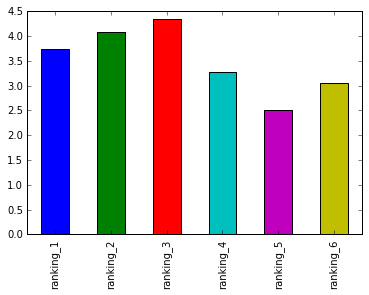

In [82]:
#we run the %matplotlib in line code to allow our visualizations show in notebok
%matplotlib inline
#We calculate the mean of the rankings, and we might save the result into series
# for easier mapping

mean_ranking = star_wars.iloc[:,9:15].mean()

#Then we use series.plot.bar to plot the values in a bar chart
mean_ranking.plot.bar()

plt.show()


1. Using our legend and the understanding that a lesser score means a better performance of the franchise, we can see that ranking 5. which is same as empire strikes back is the favourite franchise of the star wars according to the survey.
also, ranking_3 which is same as revenge of the sith performed the worse of all the franchise
2. Although, might just be coincidence, but the last three franchise performed better than the earlier three on an average and therefore may suggest that the star wars fans are enjoying the new graphics or improvements over the older ones

Next, we can compute,based on the results of this survey the number of people that have seen the various franchises


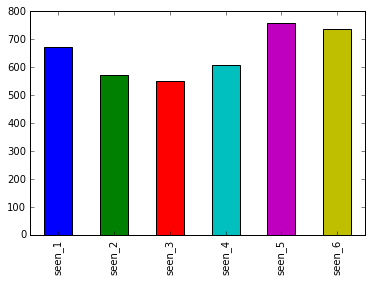

In [87]:
#We call the df.sum on the columns representing the seen columns
seen_sum = star_wars.iloc[:,3:9].sum()

#We plot the results using a bar chart
seen_sum.plot.bar()
plt.show()

From the results of this, we saw that the franchises that did better also has more viewings and vice versal. This might validate the reasons why they are rated better.


Another interesting perspective will be to analyse the statistics of the viewers based on their gender, and since there is only two options, male and female, we can divide the data into two and analyse the

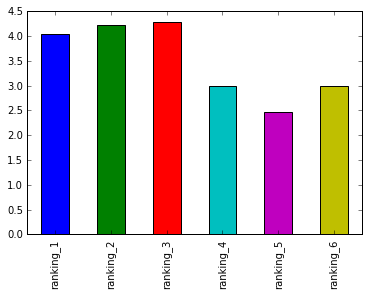

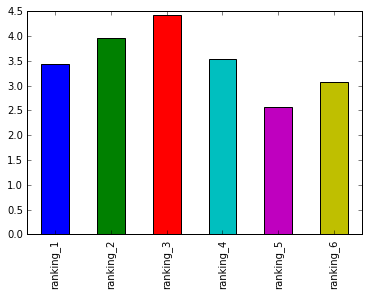

In [88]:
#Create two seperate dataframes, one for the male and another for the female respondents
#based on the gender column
male_respondents = star_wars[star_wars['Gender'] == 'Male']
female_respondents = star_wars[star_wars['Gender']=='Female']

#Calculate the mean for both populations
male_ratings = male_respondents.iloc[:,9:15].mean()
female_ratings = female_respondents.iloc[:,9:15].mean()

#plot a bar chat for both
male_ratings.plot.bar()
plt.show()

female_ratings.plot.bar()
plt.show()

We see that the taste of the viewers didnt really change based on their gender

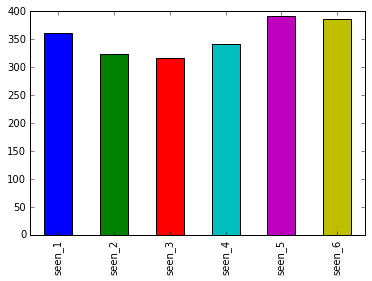

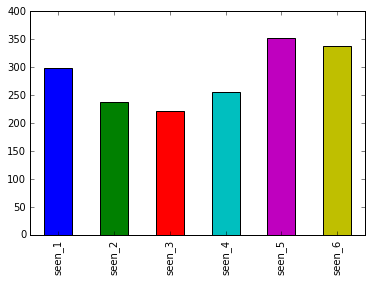

In [90]:
#We check for the viewing statistics for both geneder
male_seen = male_respondents.iloc[:,3:9].sum()

female_seen = female_respondents.iloc[:,3:9].sum()

#plot the bar graphs
male_seen.plot.bar()
plt.show()

female_seen.plot.bar()
plt.show()

We see once again that the pattern does not significantly differ from one gender to the other based on the views. although it will be interesting to see how many females vs male who participated in the survey. After checking, we see that 497 male respoondents and 549 female respondents took part in the survey and so the results are a fair representation of the survey

In [91]:
male_respondents.shape[0],female_respondents.shape[0]

(497, 549)

The next columns will be segmenting the data based on location, education and income, and seeing if there are any interesting pattersn to be seen


In [92]:
star_wars.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'seen_1',
 'seen_2',
 'seen_3',
 'seen_4',
 'seen_5',
 'seen_6',
 'ranking_1',
 'ranking_2',
 'ranking_3',
 'ranking_4',
 'ranking_5',
 'ranking_6',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦',
 'Do you consider yourself to be a fan of the Star Trek franchise?',
 'Gender',
 'Age',
 'Household Income',
 'Education',
 'Location (Census Region)']

Lets take a look at the location column which is the last on the dataframe


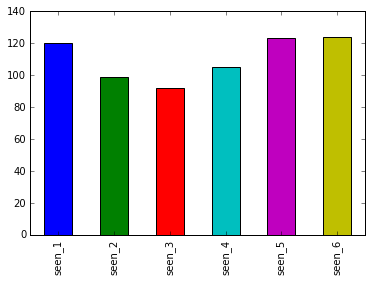

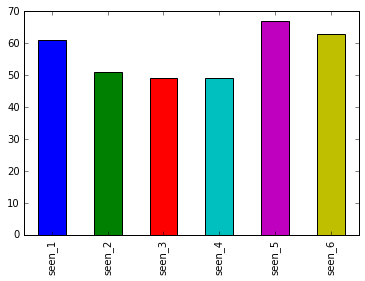

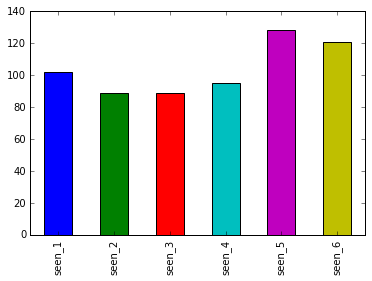

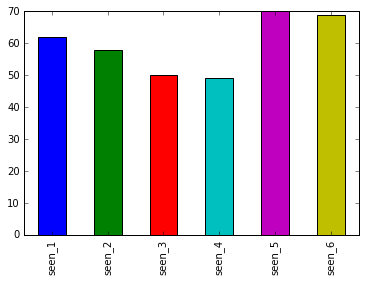

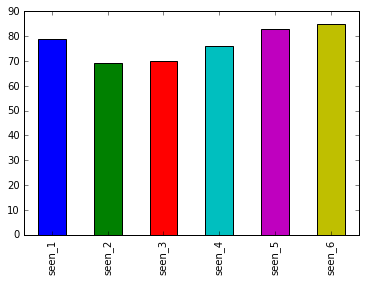

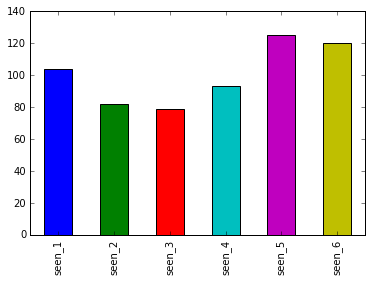

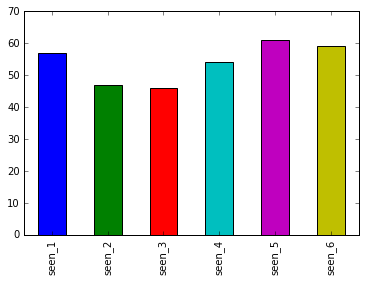

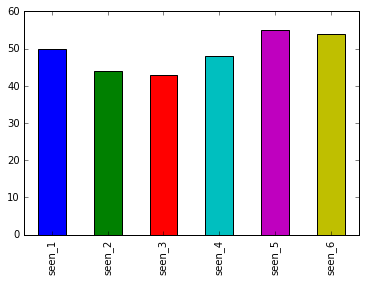

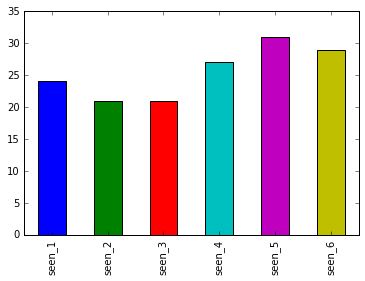

In [109]:
#check the unique response and group them 
star_wars.iloc[:,-1].value_counts()

#Next we find out which of the star wars franchise is most seen in each of the 
#locations available
loc_list = star_wars.iloc[:,-1].value_counts().index.tolist()
loc_data_frames = {}
for loc in loc_list:
    loc_data_frames[loc] = star_wars[star_wars['Location (Census Region)']==loc]

#Then we create a sum of each seen statistics for each location
sum_loc = {}
for loc_data in loc_data_frames:
    data_frame=loc_data_frames[loc_data]
    seen_loc = data_frame.iloc[:,3:9].sum()
    sum_loc[loc_data] = seen_loc
    
#plot each of the dataframes with a bar graph

for data in sum_loc:
    to_plot = sum_loc[data]
    
    plot = to_plot.plot.bar()
    plt.show()


From the results, the patter of viewing is almost the same across several locations in the world.

We can repeat the same for the ratings, remembering to keep in mind that lower ratings means better scores.

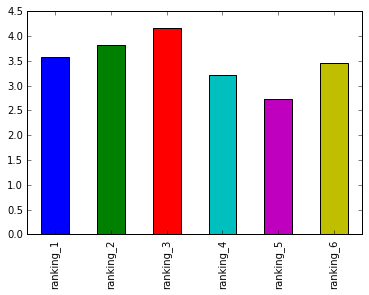

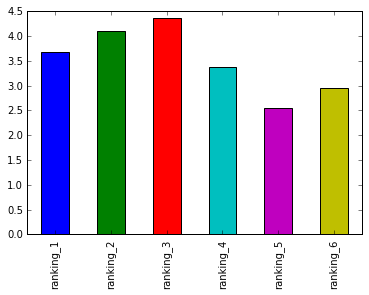

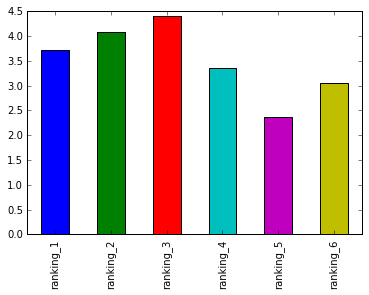

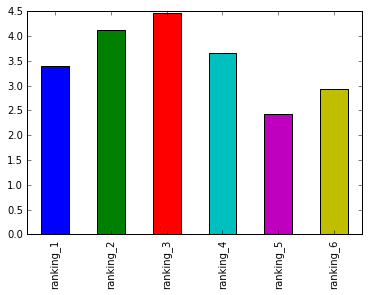

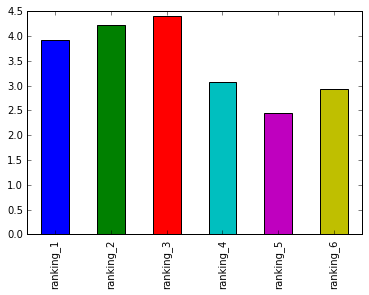

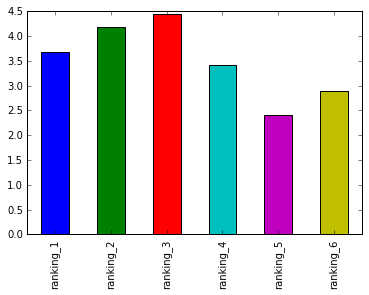

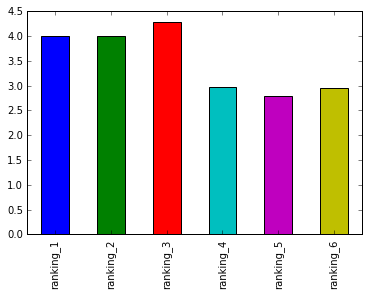

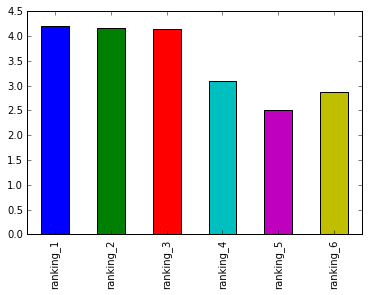

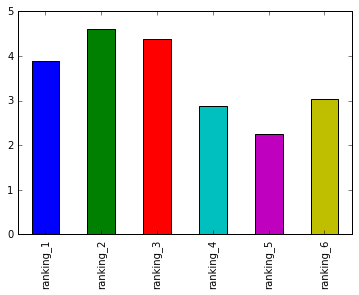

In [111]:
#check the unique response and group them 
star_wars.iloc[:,-1].value_counts()

#Next we find out which of the star wars franchise is most seen in each of the 
#locations available
loc_list = star_wars.iloc[:,-1].value_counts().index.tolist()
loc_data_frames = {}
for loc in loc_list:
    loc_data_frames[loc] = star_wars[star_wars['Location (Census Region)']==loc]

#Then we create a sum of each seen statistics for each location
ratings_loc = {}
for loc_data in loc_data_frames:
    data_frame=loc_data_frames[loc_data]
    ratings = data_frame.iloc[:,9:15].mean()
    ratings_loc[loc_data] = ratings
    
#plot each of the dataframes with a bar graph

for data in sum_loc:
    to_plot = ratings_loc[data]
    
    plot = to_plot.plot.bar()
    plt.show()


Also here we discovered that they are alomos the same pattern across the entire b